In [1]:
import pandas as pd
#load the CSV file
df = pd.read_csv('bank-full.csv')
print ('Number of samples: ',len(df))

Number of samples:  45211


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [3]:
df.head()


,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [5]:
#Shape of the data set
df.shape
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64

In [6]:
df[list(df.columns)[:10]].head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [14]:
# number of rows in dataset

print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))


Bank marketing dataset consists of 45211 rows.


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_train=pd.read_csv("bank-full.csv",sep=";")

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [103]:
data_train = pd.read_csv("bank-full.csv", na_values =['NA'])
columns = data_train.columns.values[0].split(';')
columns = data_train.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
data_train = data_train.values
data_train = [items[0].split(';') for items in data_train]
data_train = pd.DataFrame(data_train,columns = columns)


In [104]:
data_train = pd.DataFrame(data_train,columns = columns)

In [105]:
data_train['job'] = data_train['job'].str.replace('"', '')
data_train['marital'] = data_train['marital'].str.replace('"', '')
data_train['education'] = data_train['education'].str.replace('"', '')
data_train['default'] = data_train['default'].str.replace('"', '')
data_train['housing'] = data_train['housing'].str.replace('"', '')
data_train['loan'] = data_train['loan'].str.replace('"', '')
data_train['contact'] = data_train['contact'].str.replace('"', '')
data_train['month'] = data_train['month'].str.replace('"', '')
data_train['day'] = data_train['day'].str.replace('"', '')
data_train['poutcome'] = data_train['poutcome'].str.replace('"', '')
data_train['y'] = data_train['y'].str.replace('"', '')

In [106]:
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [107]:
data_train1=data_train.iloc[:,[0,1,2,3,4,5,6,7]]

In [108]:
data_train.shape
data_train.head()
data_train.info()
data_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [109]:
data_train1

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no
45207,71,retired,divorced,primary,no,1729,no,no
45208,72,retired,married,secondary,no,5715,no,no
45209,57,blue-collar,married,secondary,no,668,no,no


In [110]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [111]:
data = pd.concat([data_train])
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [112]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [113]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

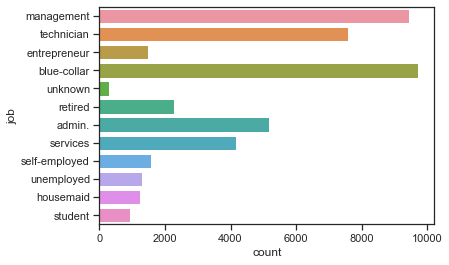

In [49]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)


In [50]:
data = data[data.job != 'unknown']

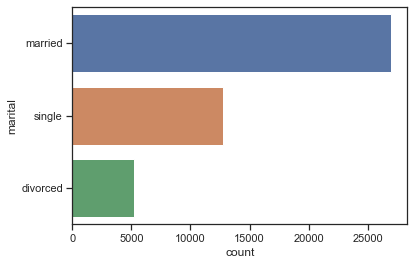

In [51]:
sns.countplot(y='marital', data=data)

In [52]:
data.marital.value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

In [53]:
data = data[data.marital != 'unknown']
data = data[data.loan != 'unknown']

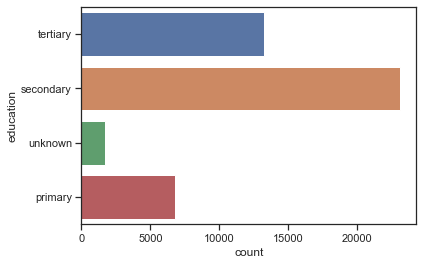

In [54]:
sns.countplot(y='education', data=data)

In [55]:
data = data[data.education != 'illiterate']

In [56]:
data.describe()

,age,job,marital,education,default,balance,housing,loan
count,44923,44923,44923,44923,44923,44923,44923,44923
unique,77,11,3,4,2,7142,2,2
top,32,blue-collar,married,secondary,no,0,yes,no
freq,2084,9732,27011,23131,44110,3486,25104,37683


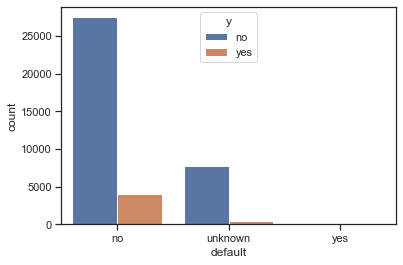

In [27]:
sns.countplot(x='default',hue='y',data=data)

In [28]:
data = data.drop('default',axis=1)

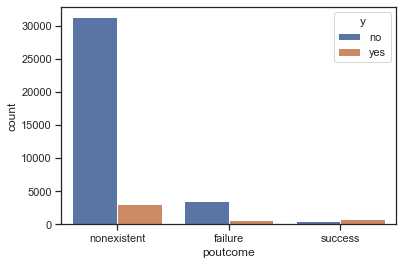

In [29]:
sns.countplot(x='poutcome',hue='y',data=data)

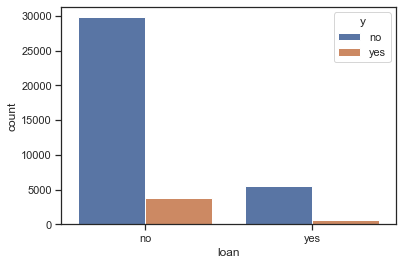

In [30]:
sns.countplot(x='loan',hue='y',data=data)

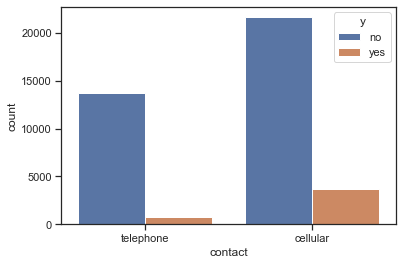

In [31]:
sns.countplot(x='contact',hue='y',data=data)

In [64]:
data.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
5,35,management,married,tertiary,no,231,yes,no


In [114]:
data_train1.rename(columns={"loan":"loan_1"})

,age,job,marital,education,default,balance,housing,loan_1
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no
45207,71,retired,divorced,primary,no,1729,no,no
45208,72,retired,married,secondary,no,5715,no,no
45209,57,blue-collar,married,secondary,no,668,no,no


In [115]:
X=data_train1.iloc[:,:-2]
Y=data_train1.iloc[:,-1]

In [116]:
X

,age,job,marital,education,default,balance
0,58,management,married,tertiary,no,2143
1,44,technician,single,secondary,no,29
2,33,entrepreneur,married,secondary,no,2
3,47,blue-collar,married,unknown,no,1506
4,33,unknown,single,unknown,no,1
...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825
45207,71,retired,divorced,primary,no,1729
45208,72,retired,married,secondary,no,5715
45209,57,blue-collar,married,secondary,no,668


In [117]:
Y

0         no
1         no
2        yes
3         no
4         no
        ... 
45206     no
45207     no
45208     no
45209     no
45210     no
Name: loan, Length: 45211, dtype: object

Building different Models and validating using 10 fold cross validation

In [39]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_train["job"] = label_encoder.fit_transform(data_train["job"])
data_train["marital"] = label_encoder.fit_transform(data_train["marital"])
data_train["education"] = label_encoder.fit_transform(data_train["education"])  
data_train["default"] = label_encoder.fit_transform(data_train["default"])
data_train["housing"] = label_encoder.fit_transform(data_train["housing"]) 
data_train["loan"] = label_encoder.fit_transform(data_train["loan"])
data_train["contact"] = label_encoder.fit_transform(data_train["contact"])
data_train["month"] = label_encoder.fit_transform(data_train["month"])
data_train["poutcome"] = label_encoder.fit_transform(data_train["poutcome"])
data_train["y"] = label_encoder.fit_transform(data_train["y"])


In [7]:
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [8]:
data_train3= data_train.iloc[:,[0,1,2,3,4,5,6,7,16]]

In [9]:
data_train3

,age,job,marital,education,default,balance,housing,loan,y
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,47,1,1,3,0,1506,1,0,0
4,33,11,2,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,1
45207,71,5,0,0,0,1729,0,0,1
45208,72,5,1,1,0,5715,0,0,1
45209,57,1,1,1,0,668,0,0,0


In [10]:
X = data_train3.iloc[:,:-2]
Y = data_train3.iloc[:,-1]

In [11]:
X

,age,job,marital,education,default,balance,housing
0,58,4,1,2,0,2143,1
1,44,9,2,1,0,29,1
2,33,2,1,1,0,2,1
3,47,1,1,3,0,1506,1
4,33,11,2,3,0,1,0
...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0
45207,71,5,0,0,0,1729,0
45208,72,5,1,1,0,5715,0
45209,57,1,1,1,0,668,0


In [12]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [13]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\usr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
y_pred_df= pd.DataFrame({'actual': Y,'predicted': y_pred})

In [16]:
y_pred_df.sum()

actual       5289
predicted      12
dtype: int64

In [17]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print (cm)


[[39914     8]
 [ 5285     4]]


In [18]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
sensitivity=TP/(TP+FN)
spec=TN/(TN+FP)
precision=TP/(TP+FP)
print(sensitivity,spec,precision)


0.0007562866326337682 0.9997996092380141 0.3333333333333333


In [19]:
import numpy as np
Accuracy= np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(Accuracy)


0.8829267213731171


In [20]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.33      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.61      0.50      0.47     45211
weighted avg       0.82      0.88      0.83     45211



In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

df_new=pd.DataFrame({"fpr":fpr,"tpr":tpr,"cutoff":thresholds})
df_new[df_new["fpr"]>=0.32]


,fpr,tpr,cutoff
4822,0.320300,0.479675,0.152436
4823,0.320300,0.479864,0.152434
4824,0.320475,0.479864,0.152389
4825,0.320525,0.479864,0.152387
4826,0.320625,0.479864,0.152363
...,...,...,...
11929,0.999424,0.999811,0.036648
11930,0.999499,0.999811,0.036469
11931,0.999549,0.999811,0.036390
11932,1.000000,0.999811,0.032260


Text(0, 0.5, 'True Positive Rate')

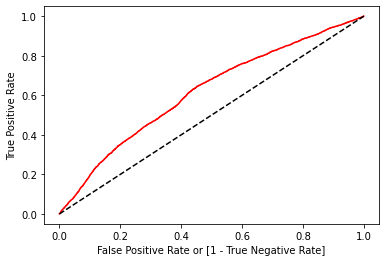

In [24]:
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [25]:
prob=classifier.predict_proba(X)
prob=prob[:,1]

new_pred= pd.DataFrame({'actual': Y,"pred":0})
new_pred.loc[prob>0.163,"pred"]=1
new_pred


,actual,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
45206,1,1
45207,1,0
45208,1,0
45209,0,0


In [26]:
cm_new=confusion_matrix(new_pred.actual,new_pred.pred)
cm_new

array([[28564, 11358],
       [ 2931,  2358]], dtype=int64)

In [27]:
print(classification_report(new_pred.actual,new_pred.pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80     39922
           1       0.17      0.45      0.25      5289

    accuracy                           0.68     45211
   macro avg       0.54      0.58      0.52     45211
weighted avg       0.82      0.68      0.74     45211

